# Importing Libraries

In [4]:
import tensorflow as tf
from tqdm import tqdm
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image

import ipywidgets as widgets
import io
from IPython.display import clear_output,display

## Load data

In [5]:
image_path="/kaggle/input/driver-drowsy/train_data"

In [6]:
cls_name=os.listdir(image_path)
print(cls_name)

['drowsy', 'notdrowsy']


In [7]:
label_name=['drowsy', 'notdrowsy']

# Resizing the images

In [8]:
print("presprocess train data\n")

image_data=[]
label_data=[]
image_size=150

for i in label_name:
    data_path=os.path.join("/kaggle/input/driver-drowsy/","train_data",i)
    for m in tqdm(os.listdir(data_path)):
        image=cv2.imread(os.path.join(data_path,m))
        image=cv2.resize(image,(image_size,image_size))
        
        image_data.append(image)
        label_data.append(i)
        
image_data=np.array(image_data)
label_data=np.array(label_data)

presprocess train data



100%|██████████| 30491/30491 [01:40<00:00, 302.31it/s]


### Shuffle data

In [9]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)

### Split data

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

### Convert to categorical

In [11]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(label_name.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
for n in Y_test:
    test_label_data_new.append(label_name.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

### Network

In [12]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

In [13]:
vgg = VGG19(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(2, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        16,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,040,770 (76.45 MB)

 Trainable params: 16,386 (64.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [14]:
import tensorflow
import keras

In [15]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

### Fit the network

In [16]:
history=modelvgg.fit(X_train,Y_train,
 epochs=10,
 batch_size= 10,
 validation_data=(X_test,Y_test), callbacks=callback)

Epoch 1/10


I0000 00:00:1729430136.619754     325 service.cc:145] XLA service 0x7cd3f8005c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729430136.619792     325 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729430136.619796     325 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   5/5322 ━━━━━━━━━━━━━━━━━━━━ 3:00 34ms/step - auc: 0.3550 - loss: 14.1394

I0000 00:00:1729430140.151001     325 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5322/5322 ━━━━━━━━━━━━━━━━━━━━ 254s 47ms/step - auc: 0.9048 - loss: 1.2250 - val_auc: 0.9457 - val_loss: 0.7706
Epoch 2/10
5322/5322 ━━━━━━━━━━━━━━━━━━━━ 244s 46ms/step - auc: 0.9499 - loss: 0.9049 - val_auc: 0.9690 - val_loss: 0.5291
Epoch 3/10
5322/5322 ━━━━━━━━━━━━━━━━━━━━ 245s 46ms/step - auc: 0.9570 - loss: 0.8463 - val_auc: 0.9350 - val_loss: 1.7270
Epoch 4/10
5322/5322 ━━━━━━━━━━━━━━━━━━━━ 245s 46ms/step - auc: 0.9624 - loss: 0.7642 - val_auc: 0.9510 - val_loss: 0.8859
Epoch 5/10
5322/5322 ━━━━━━━━━━━━━━━━━━━━ 245s 46ms/step - auc: 0.9651 - loss: 0.7266 - val_auc: 0.9739 - val_loss: 0.5382
Epoch 6/10
5322/5322 ━━━━━━━━━━━━━━━━━━━━ 245s 46ms/step - auc: 0.9663 - loss: 0.7418 - val_auc: 0.9853 - val_loss: 0.2470
Epoch 7/10
5322/5322 ━━━━━━━━━━━━━━━━━━━━ 245s 46ms/step - auc: 0.9684 - loss: 0.7026 - val_auc: 0.9788 - val_loss: 0.4184
Epoch 8/10
5322/5322 ━━━━━━━━━━━━━━━━━━━━ 245s 46ms/step - auc: 0.9731 - loss: 0.5577 - val_auc: 0.9469 - val_loss: 1.1308
Epoch 9/10
5322/5322 ━━━━━━

### Train accuracy

In [17]:
loss, accuracy = modelvgg.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

1663/1663 ━━━━━━━━━━━━━━━━━━━━ 143s 81ms/step - auc: 0.9859 - loss: 0.2241
Train Loss:  0.22063212096691132
Train Accuracy:  0.986126184463501


### Test accuracy

In [18]:
loss, accuracy = modelvgg.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

416/416 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - auc: 0.9851 - loss: 0.2402
Test Loss:  0.2470255047082901
Test Accuracy:  0.9852569699287415


### Train and test accuracy and loss graph

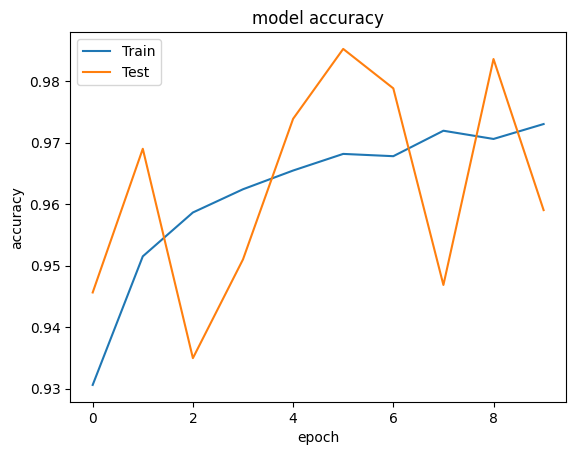

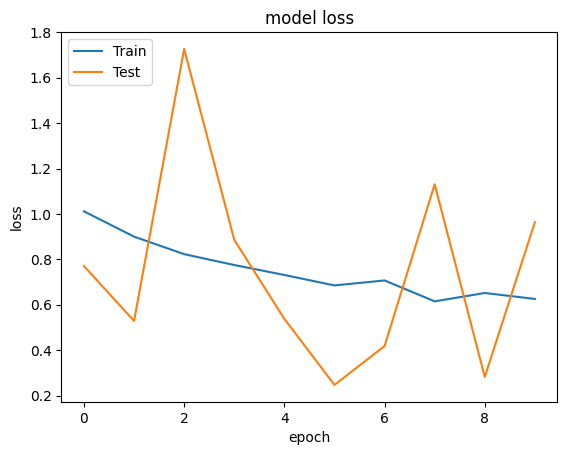

In [19]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
predictions = modelvgg.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=label_name)

416/416 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step
[[7024  138]
 [ 168 5975]]


In [25]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

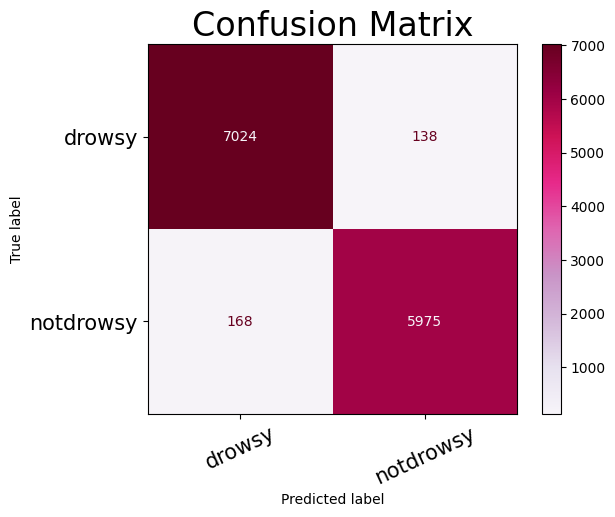

In [26]:
display_c_m.plot(cmap='PuRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'

# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)

# Saving plot
plt.savefig('confusion_matrixcnn.png', transparent=True, dpi=500)

# Showing the plot
plt.show()


### Classification Report

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7162
           1       0.98      0.97      0.98      6143

    accuracy                           0.98     13305
   macro avg       0.98      0.98      0.98     13305
weighted avg       0.98      0.98      0.98     13305



### Saving the model

In [28]:
modelvgg.save('drowsy.h5')